In [42]:
# Basic Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data engineering Libs
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, chi2, VarianceThreshold
from sklearn.decomposition import PCA

In [43]:
df = pd.read_csv('/kaggle/input/parkinsons-tele-monitoring-dataset/parkinsons_updrs.csv')

In [44]:
df.shape

(5875, 22)

In [45]:
num_col = df.select_dtypes(exclude='object')

In [46]:
corr = num_col.corr()

<Axes: >

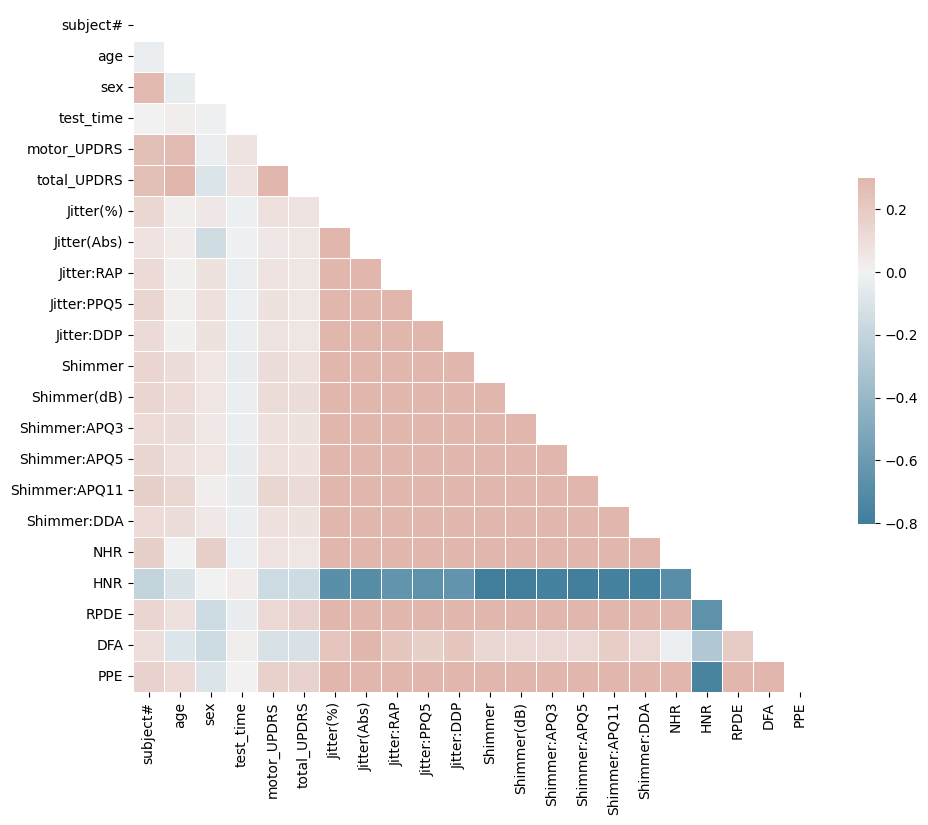

In [47]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
df.head(4)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277


In [49]:
df.sample(10)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
715,5,75,0,126.420,32.244,43.244,0.00618,0.000046,0.00299,0.00262,...,0.454,0.02878,0.03094,0.03492,0.08635,0.018973,20.628,0.52792,0.64142,0.21108
2275,17,66,1,27.303,22.736,28.736,0.00384,0.000018,0.00203,0.00205,...,0.232,0.01391,0.01608,0.01897,0.04174,0.009950,23.160,0.46393,0.62038,0.15634
261,2,58,0,99.363,13.026,15.030,0.01169,0.000090,0.00686,0.00635,...,0.388,0.02098,0.02428,0.03140,0.06294,0.043399,19.879,0.54142,0.78906,0.22669
2788,20,67,0,39.844,11.484,17.484,0.00644,0.000055,0.00304,0.00314,...,0.143,0.00776,0.00969,0.01347,0.02328,0.012525,23.414,0.48485,0.78242,0.24224
275,2,58,0,31.817,11.643,14.321,0.00708,0.000049,0.00390,0.00335,...,0.273,0.01494,0.01617,0.02010,0.04482,0.031094,22.913,0.56890,0.69527,0.18446
4134,30,49,0,95.308,25.242,36.134,0.00462,0.000045,0.00131,0.00167,...,0.122,0.00425,0.00557,0.01051,0.01276,0.015787,24.854,0.67572,0.67516,0.16149
5003,37,56,1,133.710,35.375,45.326,0.00231,0.000011,0.00132,0.00125,...,0.283,0.01823,0.01679,0.02096,0.05468,0.010280,22.684,0.50143,0.58618,0.12266
240,2,58,0,122.810,14.736,16.984,0.00909,0.000068,0.00483,0.00536,...,0.333,0.02010,0.02394,0.02705,0.06030,0.035066,19.885,0.52772,0.74599,0.25965
1646,12,62,0,98.356,15.000,21.185,0.00450,0.000030,0.00239,0.00238,...,0.300,0.01474,0.01620,0.02548,0.04421,0.022078,20.933,0.57088,0.59143,0.24709
4596,34,59,0,80.600,21.914,30.457,0.00449,0.000043,0.00192,0.00222,...,0.118,0.00363,0.00535,0.01126,0.01088,0.016584,27.452,0.63161,0.74037,0.18845


In [50]:
df.columns.to_list()

['subject#',
 'age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [51]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [52]:
df.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
skew(df.PPE)

1.0905403705821846

<Axes: >

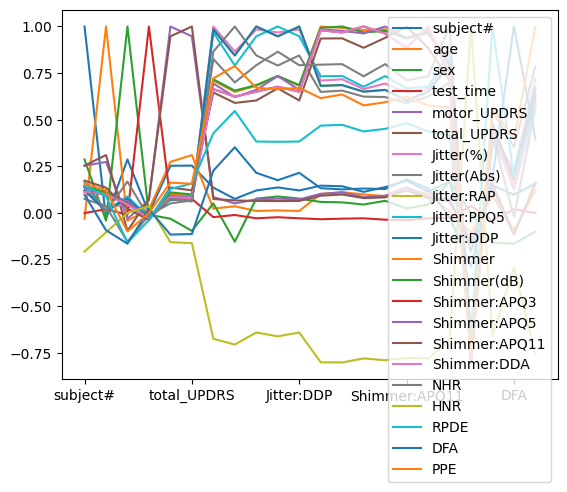

In [55]:
df.corr().plot(kind='line')

Will need to handle HNR

In [56]:
X = df.drop(['subject#','PPE'],axis=1)
y = df.PPE

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
k_best = 14
select_kbest = SelectKBest(f_classif, k=k_best)
X_kbest = select_kbest.fit_transform(X_scaled, y)

In [59]:
X_kbest

array([[ 0.08290524, -0.28424219,  0.32745251, ..., -0.29872083,
        -0.00920476, -1.47849968],
       [-0.56079341, -0.75672302, -0.53374622, ..., -0.35196506,
         1.28264969, -1.24788006],
       [-0.23894409, -0.53938184, -0.30003802, ..., -0.19936959,
         0.31871139, -1.5401393 ],
       ...,
       [-0.47366293, -0.5371584 , -0.46971658, ..., -0.24157292,
         0.78902751, -1.04885603],
       [-0.5945787 , -0.65833584, -0.54655215, ..., -0.40437158,
         0.6391696 , -1.26903782],
       [-0.59280052, -0.63721316, -0.52414178, ..., -0.40122183,
         0.36812022, -1.163249  ]])

In [60]:
selected_feature_indices = select_kbest.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'DFA'],
      dtype='object')


In [61]:
percentile = 80 
select_percentile = SelectPercentile(f_classif, percentile=percentile)
X_percentile = select_percentile.fit_transform(X_scaled, y)

In [62]:
skew(X_percentile)

array([ 0.78267354,  6.45019835,  3.28223714,  6.94366455,  7.58426843,
        6.94360231,  3.31194675,  3.09842933,  3.09643216,  3.69711704,
        3.40608855,  3.09643321,  6.54745038, -0.81185003, -0.03742483,
        0.28200643])

In [63]:
selected_feature_indices = select_percentile.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

In [64]:
print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['sex', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA'],
      dtype='object')


In [65]:
n_components = 15
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)

for i in range(n_components):
    print(f"Top features for Principal Component {i+1}:")
    top_features = pca_components_df.iloc[i].sort_values(ascending=False).index
    print(top_features[:5]) 
    print("\n")

Top features for Principal Component 1:
Index(['Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5', 'Shimmer:APQ3',
       'Shimmer:DDA'],
      dtype='object')


Top features for Principal Component 2:
Index(['DFA', 'Jitter:RAP', 'Jitter:DDP', 'Jitter(%)', 'Jitter:PPQ5'], dtype='object')


Top features for Principal Component 3:
Index(['Jitter:DDP', 'Jitter:RAP', 'Jitter(Abs)', 'Jitter(%)', 'Jitter:PPQ5'], dtype='object')


Top features for Principal Component 4:
Index(['sex', 'NHR', 'HNR', 'Jitter:PPQ5', 'Jitter:RAP'], dtype='object')


Top features for Principal Component 5:
Index(['test_time', 'DFA', 'sex', 'Shimmer:DDA', 'Shimmer:APQ3'], dtype='object')


Top features for Principal Component 6:
Index(['age', 'test_time', 'HNR', 'Jitter(Abs)', 'Jitter(%)'], dtype='object')


Top features for Principal Component 7:
Index(['DFA', 'sex', 'age', 'motor_UPDRS', 'Shimmer:APQ11'], dtype='object')


Top features for Principal Component 8:
Index(['DFA', 'HNR', 'Shimmer:DDA', 'Shimmer:APQ3', 'motor_UPD

In [66]:
skew(X_pca)

array([ 3.79878116,  0.03922095,  0.31844621,  0.70988006,  0.06081068,
       -0.2774514 ,  0.31772519,  0.15648178,  0.32802252,  2.00564686,
        5.1890731 ,  1.55931136,  0.75343388,  0.98591307, -0.25513866])

In [67]:
threshold_value = 0.75  
variance_threshold = VarianceThreshold(threshold=threshold_value)
X_threshold = variance_threshold.fit_transform(X_scaled)

selected_feature_mask = variance_threshold.get_support()
selected_feature_names = X.columns[selected_feature_mask]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA'],
      dtype='object')


In [68]:
import plotly.express as px
from plotly.subplots import make_subplots

# Assuming X_scaled is your scaled data and X.columns contains feature names
n_components = 15
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and feature names
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)

# Create subplots
fig = make_subplots(rows=n_components, cols=1, subplot_titles=[f"Principal Component {i+1}" for i in range(n_components)])

# Loop through each principal component and plot the top features
for i in range(n_components):
    top_features = pca_components_df.iloc[i].sort_values(ascending=False).index[:5]
    bar_fig = px.bar(x=top_features, y=pca_components_df.iloc[i, :5], labels={'x': 'Features', 'y': 'Component Weight'}, title=f"Top features for Principal Component {i+1}")
    fig.add_trace(bar_fig['data'][0], row=i+1, col=1)

# Update layout
fig.update_layout(height=500 * n_components, showlegend=False, title_text="Top Features for Each Principal Component")
fig.show()
